## 1. Importação das Bibliotecas

In [46]:
# Analise Exploratoria
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')


# Visualização de Dados
import matplotlib.pyplot as plt


# Pre-processamento
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Metricas
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV

## 2. Importando a base de dados

In [2]:
df_original = pd.read_parquet(r"C:\Users\luiz_\OneDrive\Documents\meusprojestosDS\Modelo-de-Deteccao-de-Fraude\Dados\fraud_dataset_example.parquet")
df_original.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## 3. Análise e tratamento dos dados

In [3]:
df_original.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### 3.1 Trocar nome das colunas

In [4]:
nomes_colunas = {
    'step':'tempo', 
    'type':'tipo', 
    'amount':'valor', 
    'nameOrig':'cliente_origem', 
    'oldbalanceOrg':'saldo_anterior', 
    'newbalanceOrig':'novo_saldo',
    'nameDest':'cliente_destino', 
    'oldbalanceDest':'saldo_anterior_destino', 
    'newbalanceDest':'novo_saldo_destino', 
    'isFraud':'fraude',
    'isFlaggedFraud':'super_fraude'
}

In [5]:
df_original = df_original.rename(columns=nomes_colunas)

### 3.2 Verificando informações gerais dos dados 

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   tempo                   101613 non-null  int64  
 1   tipo                    101613 non-null  object 
 2   valor                   101613 non-null  float64
 3   cliente_origem          101613 non-null  object 
 4   saldo_anterior          101613 non-null  float64
 5   novo_saldo              101613 non-null  float64
 6   cliente_destino         101613 non-null  object 
 7   saldo_anterior_destino  101613 non-null  float64
 8   novo_saldo_destino      101613 non-null  float64
 9   fraude                  101613 non-null  int64  
 10  super_fraude            101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [7]:
df_original.describe()

,tempo,valor,saldo_anterior,novo_saldo,saldo_anterior_destino,novo_saldo_destino,fraude,super_fraude
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


## 4. Pre-Processamento

### 4.1 One-hot enconding das variaveis categoricas

In [8]:
df = pd.get_dummies(data=df_original, columns=['tipo'], dtype=int)
df.head()

,tempo,valor,cliente_origem,saldo_anterior,novo_saldo,cliente_destino,saldo_anterior_destino,novo_saldo_destino,fraude,super_fraude,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


### 4.2 Excluindo colunas desnecessárias para o modelo ('cliente_origem', 'cliente_destino', 'super_fraude')

In [9]:
df = df.drop(['cliente_origem', 'cliente_destino', 'super_fraude'], axis=1)
df.head()

,tempo,valor,saldo_anterior,novo_saldo,saldo_anterior_destino,novo_saldo_destino,fraude,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


# 5. Criando os Modelos

### Dividindo os dados em x (features) e y (variavel target)

In [10]:
x = df.drop('fraude', axis=1)
y = df['fraude']

In [11]:
SEED = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

## 5.1 Logistic Regression

### 5.1.1 Criando Modelo:

In [12]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)
modelo = lr.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

print(f"Acuracia: {accuracy_score(y_test, y_pred):.2%}")
print(f"Recall: {recall_score(y_test, y_pred):.2%}")
print(f"Precisão: {precision_score(y_test, y_pred):.2%}")
print(f"F1: {f1_score(y_test, y_pred):.2%}")

Acuracia: 99.91%
Recall: 4.35%
Precisão: 33.33%
F1: 7.69%


### 5.1.2 Visualizando Matriz de Confusão

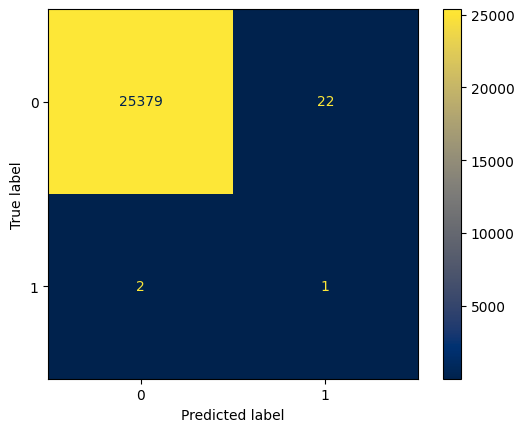

In [13]:
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis');

### 5.1.3 Visualizando Curva ROC

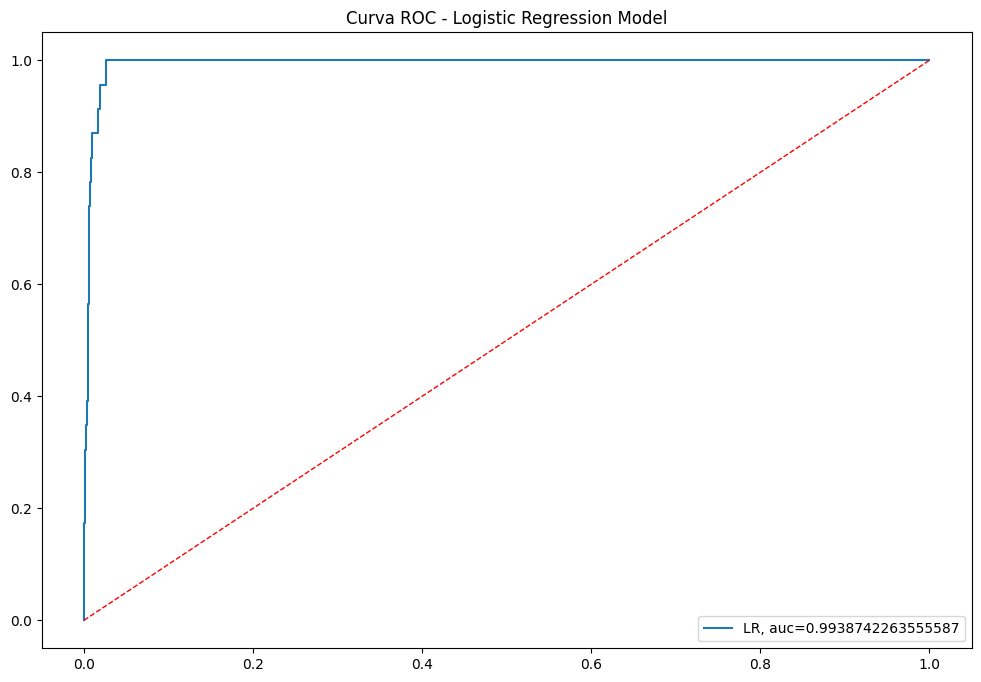

In [14]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] =  (12,8)
plt.plot(fpr, tpr, label='LR, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=1,linestyle='--')

plt.legend(loc=4)
plt.title("Curva ROC - Logistic Regression Model")

plt.show()

Na Curva Roc, quanto mais perto de 1 fica a curva azul fica, melhor ela é. Quanto mais rápido ela chega no valor 1 do eixo y, melhor. É possível notar que a subida da curva azul está boa, se estabilizando rapidamente, chegando em 1.

Ela também está com uma curva de AUC boa, com valor de 0.999. A nossa acurácia está boa, mas as nossas outras métricas, não. Provavelmente isso está acontecendo, porque as nossas classes estão desbalanceadas, o que atrapalha os nossos modelos e o trabalho com as classes. Precisamos corrigir esse problema para que esse e os modelos futuros tenham um desempenho melhor quanto às nossas métricas.

## 5.2 Tratando Desbalanceamento dos dados com Oversampling usando a classe SMOTE

In [15]:
df['fraude'].value_counts()

fraude
0    101497
1       116
Name: count, dtype: int64

### 5.2.1 Balanceando os dados

In [16]:
smote = SMOTE(random_state=SEED)
x_resampled, y_resampled = smote.fit_resample(x,y)

### 5.2.2 Recriando o dataframe com os dados balanceados

In [17]:
df_balanced = pd.concat([x_resampled, y_resampled], axis=1)
df_balanced.head()

,tempo,valor,saldo_anterior,novo_saldo,saldo_anterior_destino,novo_saldo_destino,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER,fraude
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0,0


### 5.2.3 Checando se os dados foram balanceados

In [18]:
df_balanced.fraude.value_counts()

fraude
0    101497
1    101497
Name: count, dtype: int64

## 5.3 Dividindo os dados balanceados em treino e teste novamente

In [19]:
x = df_balanced.drop('fraude', axis=1)
y = df_balanced['fraude']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

## 5.4 Logistic Regression com dados balanceados

### 5.4.1 Gerando o modelo de Regressão Logistica

In [26]:
lr = LogisticRegression(max_iter=1000, random_state=SEED)
modelo = lr.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

print(f"Acuracia: {accuracy_score(y_test, y_pred):.2%}")
print(f"Recall: {recall_score(y_test, y_pred):.2%}")
print(f"Precisão: {precision_score(y_test, y_pred):.2%}")
print(f"F1: {f1_score(y_test, y_pred):.2%}")

Acuracia: 96.35%
Recall: 96.35%
Precisão: 96.34%
F1: 96.35%


### 5.4.2 Visualizando a matriz de confusão do modelo com os dados balanceados

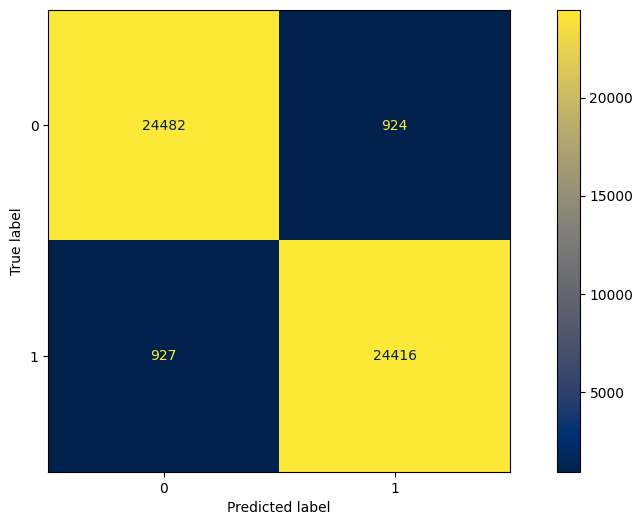

In [27]:
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis');

### 5.4.3 Visualizando Curva ROC com os dados balanceados

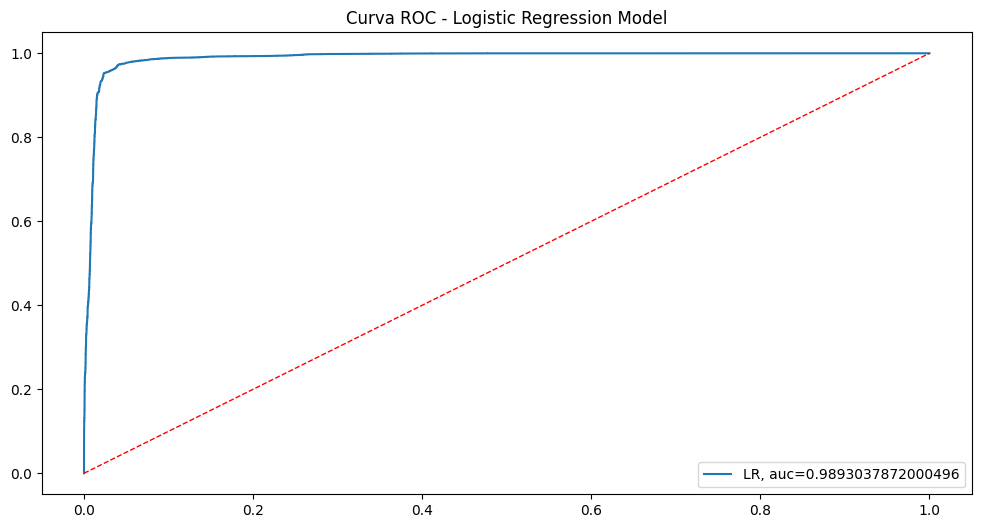

In [28]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] =  (12,6)
plt.plot(fpr, tpr, label='LR, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=1,linestyle='--')

plt.legend(loc=4)
plt.title("Curva ROC - Logistic Regression Model")

plt.show()

## 5.5 Decision Tree Classifier

In [29]:
dct = DecisionTreeClassifier(max_depth=10, random_state=SEED)

modelo_dct = dct.fit(x_train, y_train)
y_pred_dct = modelo_dct.predict(x_test)

print(f"Acuracia: {accuracy_score(y_test, y_pred_dct):.2%}")
print(f"Recall: {recall_score(y_test, y_pred_dct):.2%}")
print(f"Precisão: {precision_score(y_test, y_pred_dct):.2%}")
print(f"F1: {f1_score(y_test, y_pred_dct):.2%}")

Acuracia: 99.13%
Recall: 99.61%
Precisão: 98.65%
F1: 99.13%


### 5.5.1 Visualizando Confunsion Matrix - Descision Tree model

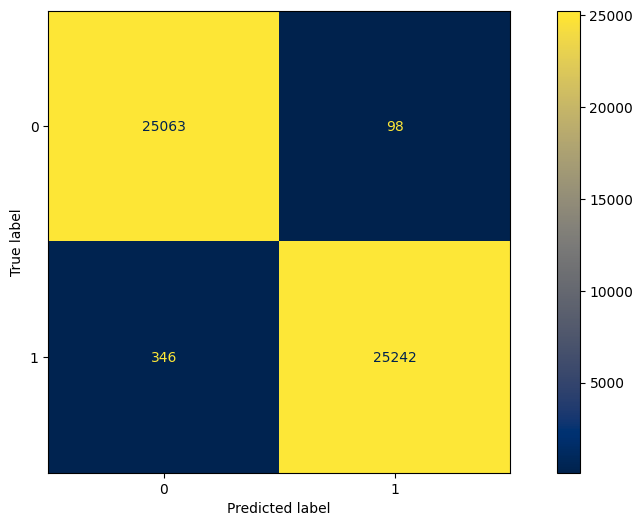

In [30]:
cm = confusion_matrix(y_pred_dct, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis');

### 5.5.2 Visualizando Curva ROC - Decision Tree model

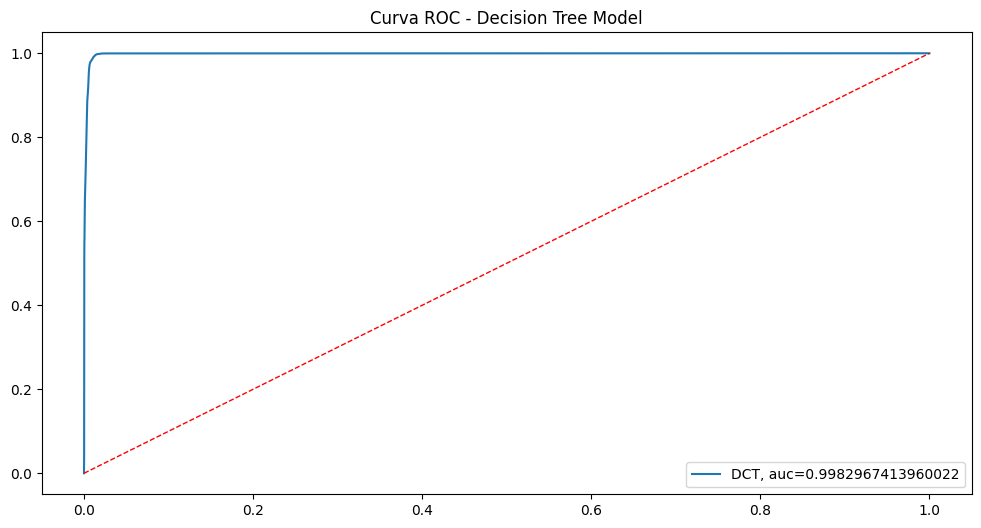

In [31]:
y_pred_proba = dct.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] =  (12,6)
plt.plot(fpr, tpr, label='DCT, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=1,linestyle='--')

plt.legend(loc=4)
plt.title("Curva ROC - Decision Tree Model")

plt.show()

## 5.6 Random Forest Classifier

In [33]:
rf = RandomForestClassifier(max_depth=10, random_state=SEED, n_estimators=50)

modelo_rf = rf.fit(x_train, y_train)
y_pred_rf = modelo_rf.predict(x_test)

print(f"Acuracia: {accuracy_score(y_test, y_pred_rf):.2%}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2%}")
print(f"Precisão: {precision_score(y_test, y_pred_rf):.2%}")
print(f"F1: {f1_score(y_test, y_pred_rf):.2%}")

Acuracia: 99.31%
Recall: 99.48%
Precisão: 99.15%
F1: 99.31%


### 5.6.1 Visualizando Confunsion Matrix - Random Forest model

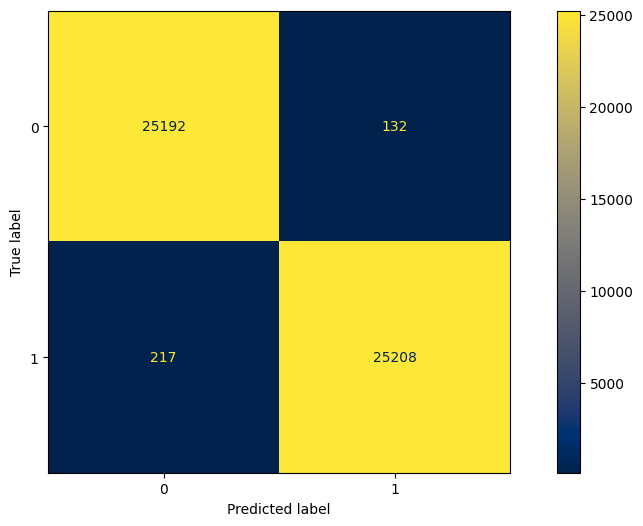

In [42]:
cm = confusion_matrix(y_pred_rf, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis');

### 5.6.2 Visualizando Curva ROC - Random Forest model

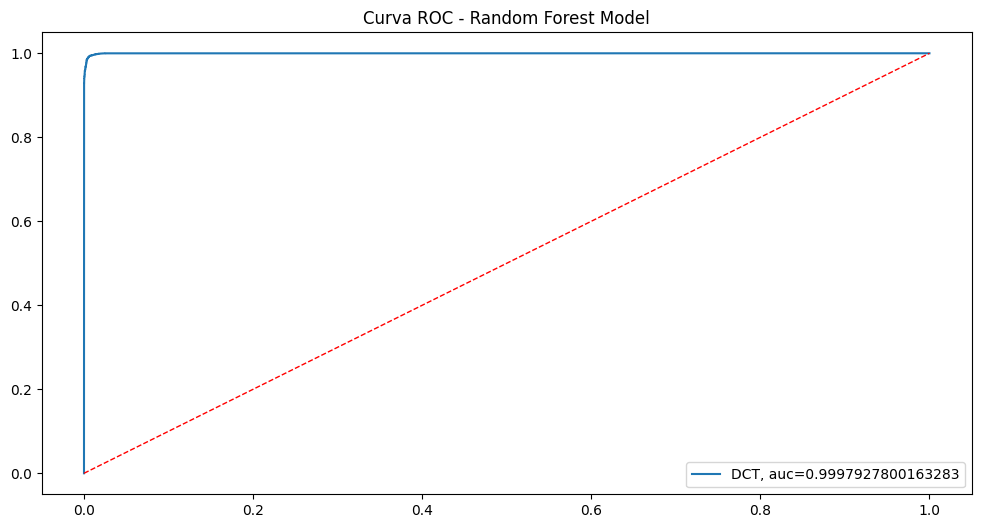

In [36]:
y_pred_proba = rf.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] =  (12,6)
plt.plot(fpr, tpr, label='DCT, auc='+str(auc))
plt.plot([0,1], [0,1], color='red', lw=1,linestyle='--')

plt.legend(loc=4)
plt.title("Curva ROC - Random Forest Model")

plt.show()

## 6. Visualizando as Metricas de cada modelo

In [37]:
classificadores = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth=10, random_state=SEED),
    RandomForestClassifier(max_depth=10, random_state=SEED, n_estimators=50)
]

LogisticRegression
***Resultados***
Acuracia: 96.35%
Recall: 96.35%
Precisão: 96.34%
F1: 96.35%
DecisionTreeClassifier
***Resultados***
Acuracia: 99.13%
Recall: 99.61%
Precisão: 98.65%
F1: 99.13%
RandomForestClassifier
***Resultados***
Acuracia: 99.31%
Recall: 99.48%
Precisão: 99.15%
F1: 99.31%


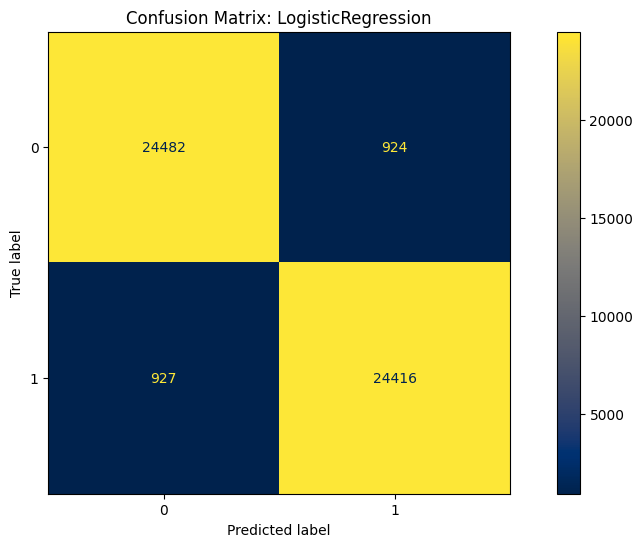

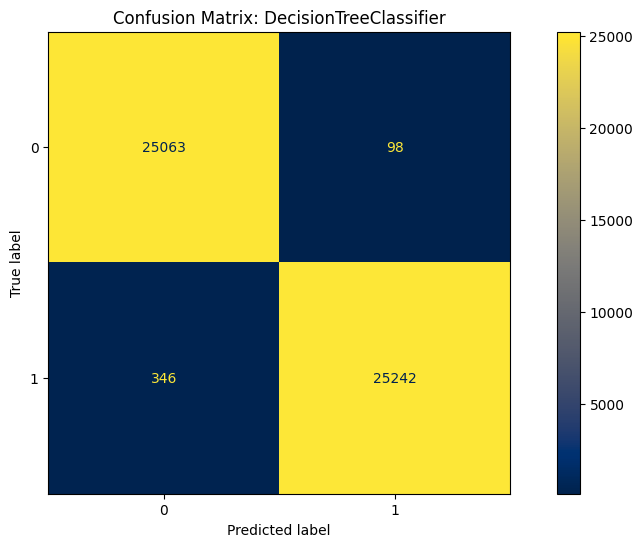

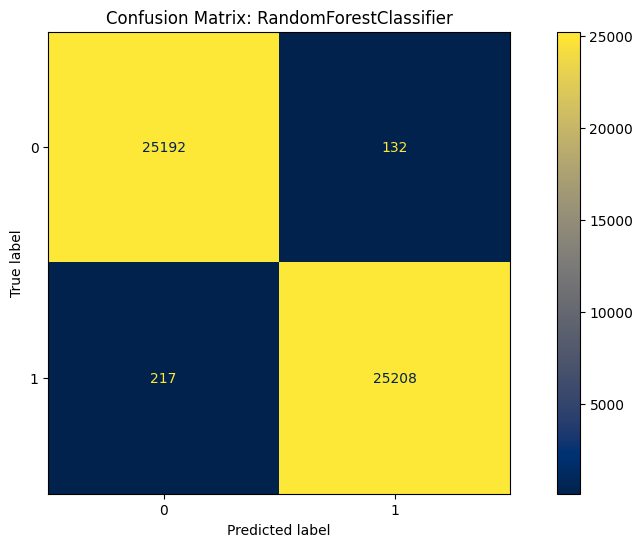

In [43]:
for clf in classificadores:
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print("***Resultados***")
    print(f"Acuracia: {accuracy_score(y_test, y_pred):.2%}")
    print(f"Recall: {recall_score(y_test, y_pred):.2%}")
    print(f"Precisão: {precision_score(y_test, y_pred):.2%}")
    print(f"F1: {f1_score(y_test, y_pred):.2%}")

    cm = confusion_matrix(y_pred, y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='cividis')
    plt.title(f"Confusion Matrix: {name}")

## 7. Melhorando o resultado do Random Forest com RandomizedSearchCV

Parametros

In [47]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [51]:
param_grid = {
    'n_estimators' : n_estimators,
    'criterion' : criterion,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap
}

In [52]:
SEED = 70
rforest = RandomForestClassifier(random_state=SEED)
rcv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)

In [53]:
rcv.fit(x, y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=70),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180])},
                   random_state=70, scoring='recall')

In [54]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059253,0.006113,0.000000,0.000000,120,4,2,auto,9,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",NaN,NaN,NaN,NaN,NaN,4
1,0.070371,0.008204,0.000000,0.000000,120,4,2,auto,2,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",NaN,NaN,NaN,NaN,NaN,4
2,20.060678,1.040489,0.243838,0.031648,40,8,1,sqrt,7,entropy,False,"{'n_estimators': 40, 'min_samples_split': 8, '...",0.980285,1.000000,0.973812,0.984699,0.011138,2
3,37.576818,3.701036,0.582607,0.185269,100,8,4,log2,9,entropy,True,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.993497,0.999025,0.992226,0.994916,0.002951,1
4,21.695792,1.184507,0.374555,0.023088,160,6,2,log2,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 6, ...",0.914223,0.943487,0.876537,0.911416,0.027404,3


In [55]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

In [56]:
rf_melhorado = RandomForestClassifier(**rcv.best_params_, random_state=SEED)

modelo_rf = rf_melhorado.fit(x_train, y_train)
y_pred_rf = modelo_rf.predict(x_test)

print(f"Acuracia: {accuracy_score(y_test, y_pred_rf):.2%}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2%}")
print(f"Precisão: {precision_score(y_test, y_pred_rf):.2%}")
print(f"F1: {f1_score(y_test, y_pred_rf):.2%}")

Acuracia: 99.16%
Recall: 99.25%
Precisão: 99.06%
F1: 99.16%


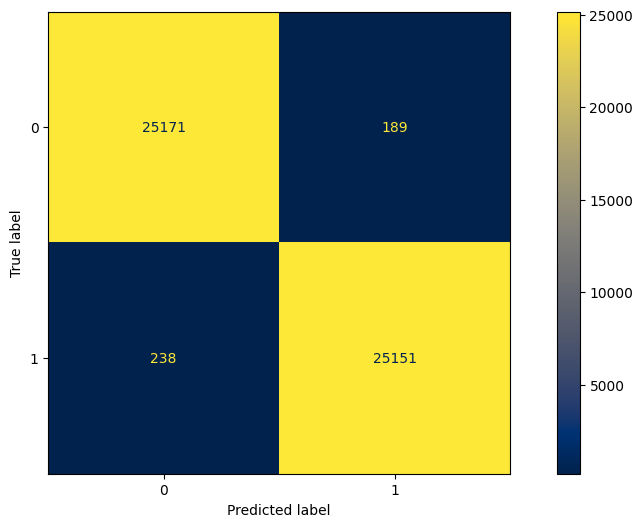

In [57]:
cm = confusion_matrix(y_pred_rf, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='cividis');